# **Лаба 3**

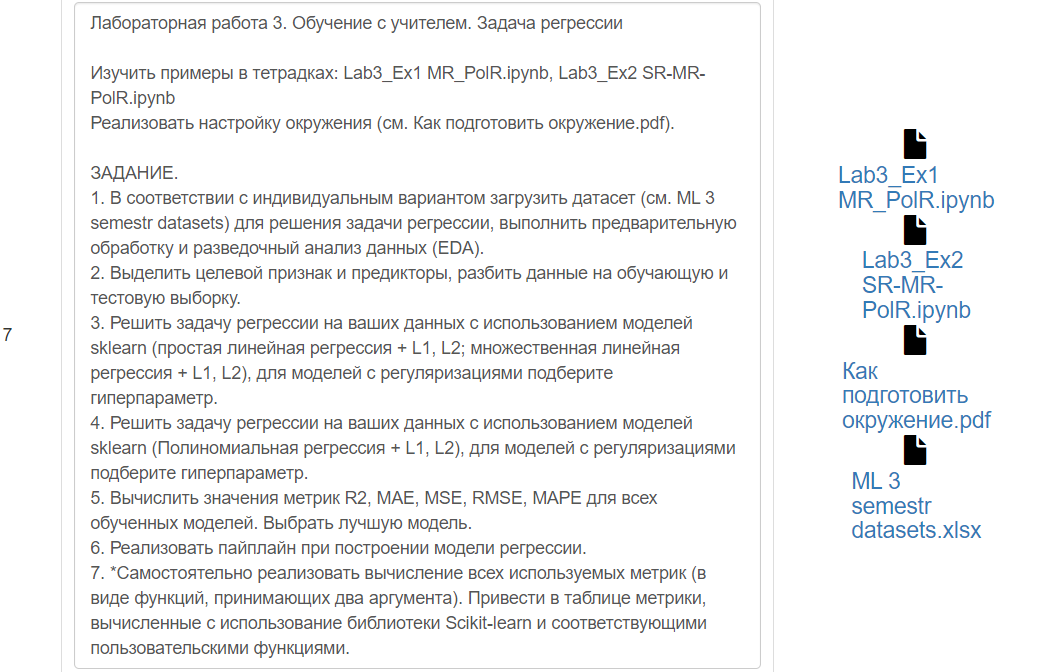

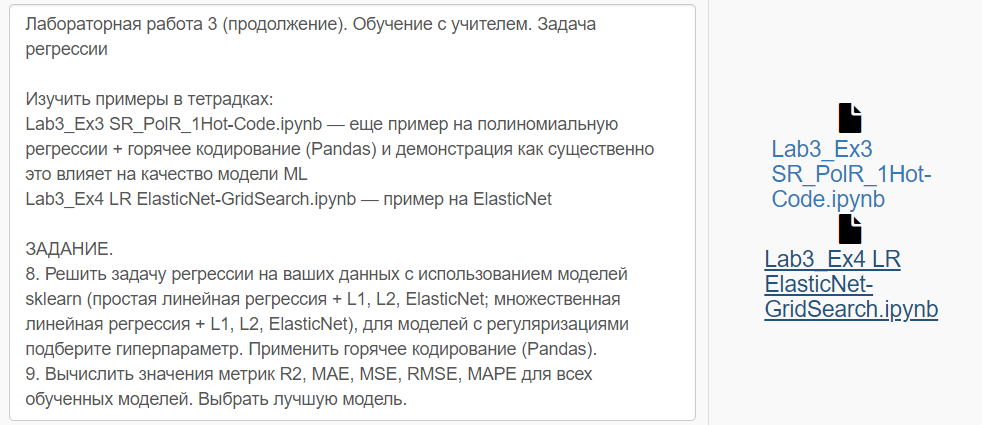

In [1]:
# Сделаю предупреждение невидимым, вылезает при использовании кодировщика BinaryEncoder, в этой библиотеке используют метод iscathegorical вместо isinstance,
# что и вызывает предупреждение
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from category_encoders.binary import BinaryEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from math import sqrt
import matplotlib.pyplot as plt

## **Предобработка**

In [2]:
df = pd.read_csv(r"../../data/Lab3/Ex1/cars.csv")
pd.set_option('display.max_columns', None)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


Проверим наличие пропусков и заполним их

In [3]:
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [4]:
df[df["engine_capacity"].isna()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,hatchback,False,owned,front,14900.0,True,Минская обл.,11,13,False,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,hatchback,False,owned,front,16000.0,False,Минская обл.,18,1,False,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,liftback,False,owned,front,12950.0,True,Минская обл.,21,5,False,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,hatchback,False,owned,front,13850.0,False,Минская обл.,20,57,False,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,hatchback,False,owned,front,9300.0,True,Минская обл.,7,21,False,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,hatchback,False,owned,front,12900.0,False,Минская обл.,12,7,False,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,hatchback,False,owned,front,14500.0,False,Минская обл.,12,19,False,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,hatchback,False,owned,front,15500.0,False,Брестская обл.,5,2,False,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,hatchback,False,owned,rear,24750.0,True,Минская обл.,23,17,False,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,liftback,False,owned,rear,39999.0,False,Минская обл.,6,2,False,True,True,True,True,True,True,True,True,True,57


Видим, что незаполненные значения в столбце engine capacity есть только у электрических автомобилей, заполним пропуски значением 0, так как камер сгорания в них нет и объём двигателя равен нулю. 

In [5]:
df["engine_capacity"].fillna(0, inplace=True)

Для применения регрессии необходимо сделать все данные числовыми. Воспользуемся кодировщиком LabelBinarizer

In [6]:
bin = BinaryEncoder()
binarized_categorical = bin.fit_transform(df.select_dtypes(include="object")).astype("int8")
data = df.select_dtypes(exclude="object")
data = pd.concat([data, pd.DataFrame(binarized_categorical)], axis=1)
data
# d = bin.inverse_transform(df.iloc[:, 1:7]) так можно раскодировать, надо передать закодированные столбцы

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,state_0,state_1,drivetrain_0,drivetrain_1,location_region_0,location_region_1,location_region_2
0,190000,2010,False,2.5,False,10900.00,False,9,13,False,True,True,True,False,True,False,True,True,True,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,12,54,False,True,False,False,True,True,False,False,False,True,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,4,72,False,True,False,False,False,False,False,False,True,True,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,9,42,True,False,False,False,False,False,False,False,False,False,86,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,14,7,False,True,False,True,True,False,False,False,False,True,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,False,True,False,False,True,True,False,False,True,True,301,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,4,20,False,True,False,False,True,True,False,False,True,True,317,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1
38528,777957,2000,False,3.5,False,4300.00,False,3,63,False,True,False,False,True,True,False,False,True,True,369,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,7,156,False,True,False,False,False,False,False,False,False,True,490,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1


Сконвертируем тип данных bool в int8 и можем приступать

In [7]:
temp = data.select_dtypes(include="bool").astype("int8")
data = data.select_dtypes(exclude="bool")
data = pd.concat([data, temp], axis=1)
data

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,state_0,state_1,drivetrain_0,drivetrain_1,location_region_0,location_region_1,location_region_2,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1
1,290000,2002,3.0,5000.00,12,54,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1
2,402000,2001,2.5,2800.00,4,72,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1
3,10000,1999,3.0,9999.00,9,42,86,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,2750.00,5,85,301,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38527,321000,2004,2.2,4800.00,4,20,317,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38528,777957,2000,3.5,4300.00,3,63,369,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1
38529,20000,2001,2.0,4000.00,7,156,490,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [8]:
data.to_csv(r"../../data/prepared_cars.csv")

In [9]:
import pickle

with open("../../models/1_multi_dimensional_regression.pickle", "rb") as f: 
    r = pickle.load(f)
    print(r.predict(data.loc[:2].drop("price_usd", axis=1)))

[12384.6875  7051.      5894.875 ]


## **Простая линейная регрессия**

Сдэлаем пайплайн.

In [10]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', LinearRegression()),
    ]
)

Выделим целевой признак и предиктор.

In [11]:
y = pd.DataFrame(data["price_usd"])
x = pd.DataFrame(data["odometer_value"])

Разделим данные.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Обучим модель.

In [13]:
lr = pipeline.fit(X_train, y_train)

Получим прогноз.

In [14]:
y_pred = pd.DataFrame(lr.predict(X_test))

Оценим модель по графику.

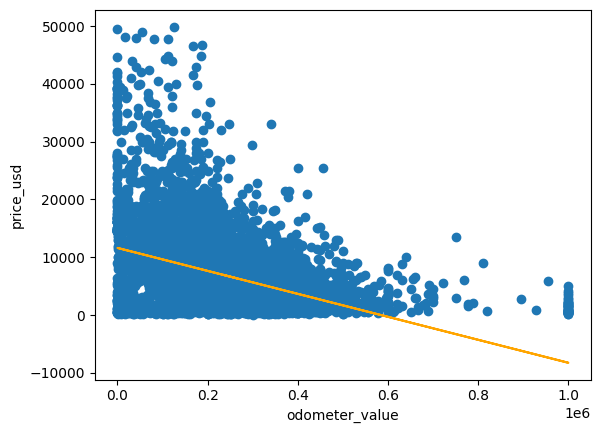

In [15]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

Данные сильно разбросаны, линейной регрессией невозможно добиться большой точности прогноза.

Посмотрим на метрики.

In [16]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 3988.80283406348
MSE: 32976407.59190802
RMSE: 5742.508823842417
MAPE: 2.654879871162586
R^2: 0.17778803948495692


Коэффициент детерминации очень низкий, модель очень сильно ошибается, а согласно метрике MAPE в среднем ошибка составляет 550%  (насколько я понял из исходного кода библиотеки scikit-learn - эта метрика выдаёт не проценты, а обычную долю).

Теперь проделаем то же самое с регуляризацией.

Сделаем пайплайн для лассо и найдём наилучшие параметры с помощью поиска по сетке.

In [17]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params
# pd.DataFrame(gridsearch.cv_results_)
# вопрос по интерпретации этой штуки. Что за столбцы split0, ... , splitn и почему в них разные числа, если датафрейм ранее уже был разделён на
# тренировочную и тестовую выборки? Может, gridsearch сам делит их на train и тест?


{'model__alpha': 0.2}

Обучим модель с регуляризацией лассо и наилучшим параметром. (он при каждом запуске получается разный)

MAE: 3988.77072294136
MSE: 32976431.651656944
RMSE: 5742.510918723355
MAPE: 2.6549069615789374
R^2: 0.1777874395950727


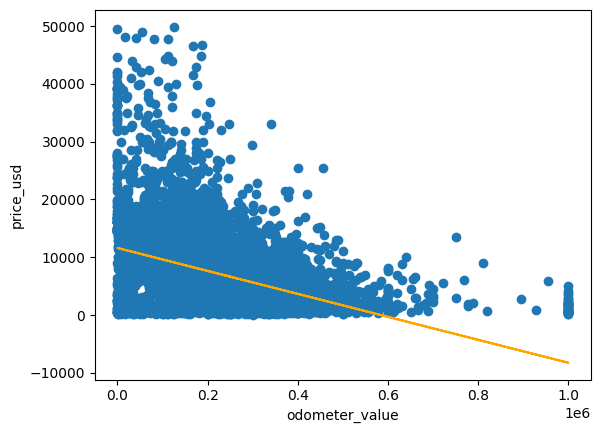

In [18]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

Теперь найдём лучший параметр для ridge

In [19]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.30000000000000004}

И подставим его в пайплайн.

MAE: 3988.771774737081
MSE: 32976430.79824163
RMSE: 5742.510844416546
MAPE: 2.6549060742357953
R^2: 0.17778746087356623


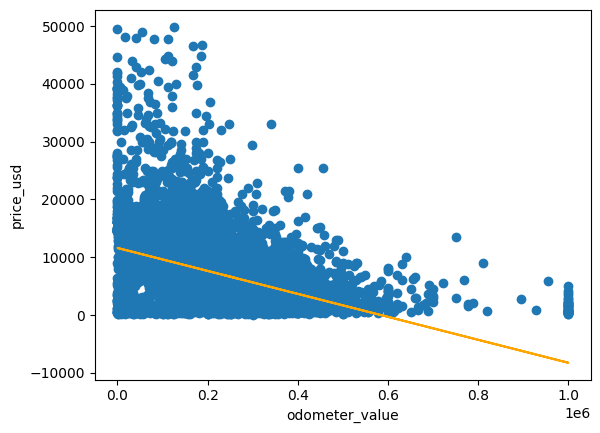

In [20]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

Теперь попробуем ElasticNet

In [21]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet())
    ]
)

Подберём гиперпараметр l1_ratio

In [22]:
param_grid = {
    "model__alpha": [0.1, 0.5, 1, 5, 30],
    "model__l1_ratio": np.arange(0.1, 1, 0.1),
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.9}

Подставим его в пайплайн

MAE: 4040.5431212493045
MSE: 33855731.80088681
RMSE: 5818.567847923302
MAPE: 2.6995454967740065
R^2: 0.1558635505976288


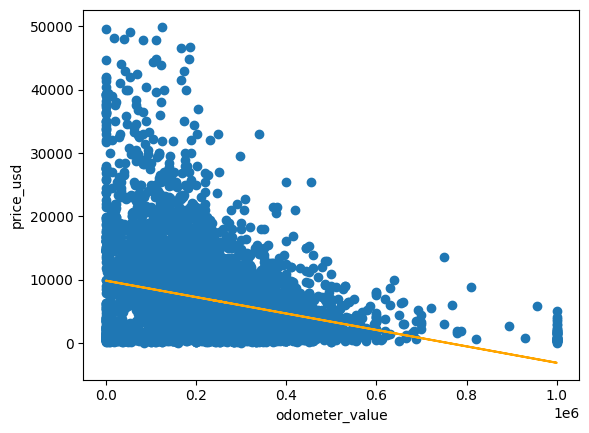

In [23]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

С регуляризацией и поиском параметров по сетке не удалось получить значительных изменений точности модели. Вывод - нужно больше предикторов, либо выбрать другой.

## **Множественная линейная регрессия**

Выделим целевой признак - цена в долларах

In [24]:
y = data["price_usd"]
x = data.drop("price_usd", axis=1)

Разделим данные на обучающую и тестовую выборки

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Сделаем пайплайн.

In [36]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", LinearRegression()),
    ]
)

Обучим модель

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [28]:
lrr = LinearRegression().fit(X_train, y_train)
lrr.feature_names_in_

array(['odometer_value', 'year_produced', 'engine_capacity',
       'number_of_photos', 'up_counter', 'duration_listed',
       'manufacturer_name_0', 'manufacturer_name_1',
       'manufacturer_name_2', 'manufacturer_name_3',
       'manufacturer_name_4', 'manufacturer_name_5', 'model_name_0',
       'model_name_1', 'model_name_2', 'model_name_3', 'model_name_4',
       'model_name_5', 'model_name_6', 'model_name_7', 'model_name_8',
       'model_name_9', 'model_name_10', 'transmission_0',
       'transmission_1', 'color_0', 'color_1', 'color_2', 'color_3',
       'engine_fuel_0', 'engine_fuel_1', 'engine_fuel_2', 'engine_type_0',
       'engine_type_1', 'body_type_0', 'body_type_1', 'body_type_2',
       'body_type_3', 'state_0', 'state_1', 'drivetrain_0',
       'drivetrain_1', 'location_region_0', 'location_region_1',
       'location_region_2', 'engine_has_gas', 'has_warranty',
       'is_exchangeable', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'featu

In [38]:
import joblib

joblib.dump(pipeline, "../../models_joblib/1_reg_joblib")

['../../models_joblib/1_reg_joblib']

Посмотрим коэффициенты и метрики

In [30]:
pipeline.named_steps["model"].coef_

array([-4.94952962e+03,  2.96670501e+04,  7.54612887e+03,  6.36885330e+03,
       -8.09122751e+02,  3.88403850e+03, -1.48204901e+03, -1.31304200e+03,
       -4.18554189e+02, -3.06096324e+02,  3.84117280e+02,  6.17342665e+02,
        2.77854342e+03,  1.82858607e+03,  1.51349996e+03,  5.44241747e+02,
        7.43335534e+01,  6.26191079e+02, -2.21573045e+02, -1.36018073e+02,
        2.73881727e+02, -1.26689931e+02,  6.82984638e+01, -4.23561645e+15,
       -4.23561645e+15,  6.31815753e+02,  2.93164330e+02,  1.39867577e+02,
       -1.20015253e+02, -1.45812507e+15, -1.45812507e+15, -1.45812507e+15,
        1.45812507e+15,  2.26175000e+03,  1.35625000e+03,  4.88250000e+02,
        8.45250000e+02, -6.02500000e+01,  9.74817188e+03,  1.11612500e+04,
       -2.22700000e+03,  1.08646875e+03, -3.49500000e+02, -2.71250000e+02,
        4.25000000e+00,  2.10730469e+02,  2.38275000e+03, -2.54000000e+02,
        3.10250000e+02, -7.03312500e+02,  4.11000000e+02,  7.99500000e+02,
        3.80000000e+01,  

In [31]:
y_pred = pipeline.predict(X_test)

In [41]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 2119.2905631244325
MSE: 10724497.74135032
RMSE: 3274.827894920635
MAPE: 2.092600343880231
R^2: 0.7250992190789166


Получился неплохой коэффициент детерминации, а также по остальным метрикам модель справилась намного лучше, чем одномерная линейная регрессия.

Попробуем с регуляризацией и поиском по сетке.

Lasso.

In [33]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso(tol=1e-1)),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.655001,0.074932,0.007711,0.000921,0.2,{'model__alpha': 0.2},0.723631,0.740797,0.723080,0.732014,0.725910,0.729086,0.006658,1
1,1.215919,0.051365,0.005359,0.002370,0.4,{'model__alpha': 0.4},0.723653,0.740714,0.723068,0.732012,0.725815,0.729052,0.006636,2
2,0.989548,0.052856,0.003118,0.002900,0.6,{'model__alpha': 0.6000000000000001},0.723654,0.740604,0.723035,0.732004,0.725699,0.728999,0.006614,3
3,0.909820,0.070929,0.003041,0.003255,0.8,{'model__alpha': 0.8},0.723641,0.740487,0.722980,0.731969,0.725562,0.728928,0.006596,4
4,0.777380,0.016350,0.004234,0.003399,1.0,{'model__alpha': 1.0},0.723626,0.740317,0.722902,0.731915,0.725400,0.728832,0.006564,5


Если не увеличить параметр tol в Lasso, то выдаются предупреждения о том, что оптимизация не сходится и код выполняется очень долго.

<font size=30> Правильно ли я понял? Правильно ли я сделал? Снизу скрины ошибок

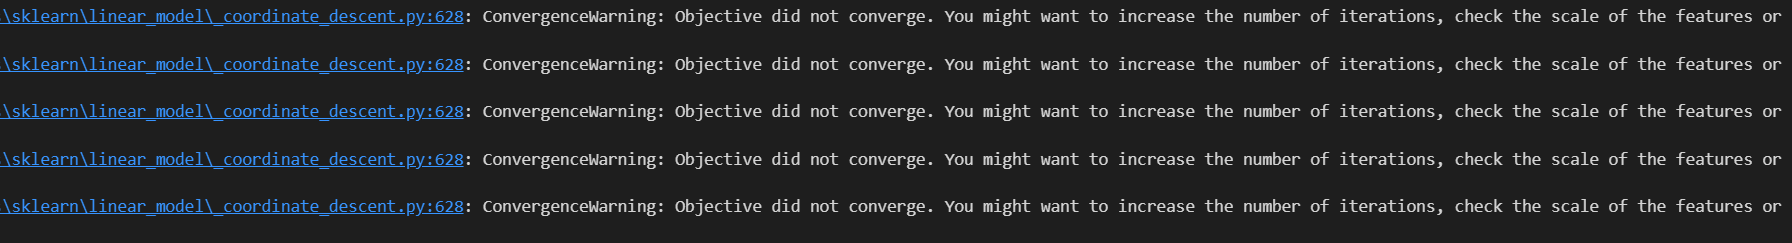

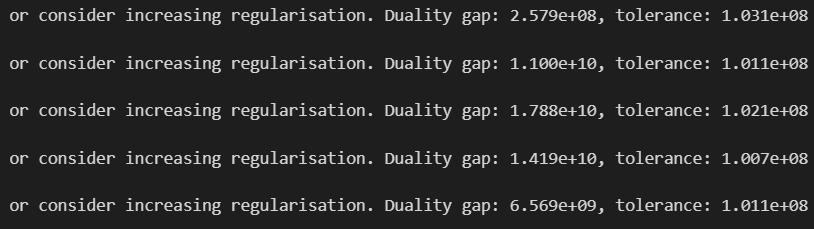

Подставим гиперпараметр в lasso

In [ ]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')


MAE: 2170.918189396632
MSE: 11576915.388627635
RMSE: 3402.4866478250337
MAPE: 0.7550320942657986
R^2: 0.7276103207354059


Теперь найдём гиперпараметр для ridge и подставим его.

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.8}

In [ ]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 2171.292647100358
MSE: 11566161.051367914
RMSE: 3400.905916277002
MAPE: 0.7516629539122652
R^2: 0.7278633562270322


Попробуем ElasticNet

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__l1_ratio": np.arange(0.2, 1, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__l1_ratio': 0.8}

In [ ]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 2956.8770279923156
MSE: 21557423.50765675
RMSE: 4642.997254754384
MAPE: 1.6857913937784672
R^2: 0.4927820168064878


Снова с ElasticNet точность модели только ухудшилась.

## **Полиномиальная регрессия**

Сделаем пайплайн

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", LinearRegression()),
    ]
)

Возьмём столбец year_produced в качестве предиктора и разделим выборку на тренировочную и тестовую.

In [ ]:
x = data["year_produced"].array.reshape(-1, 1)
y = data["price_usd"].array.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_for_plot = X_test.copy()  # Столбец, который не будет возводиться в степень и будет использован для графика.

Обучим модель и посмотрим, как она справилась

MAE: 2495.407467753495
MSE: 17275038.601355076
RMSE: 4156.325131814771
MAPE: 0.7792321424816302
R^2: 0.5931245923566018


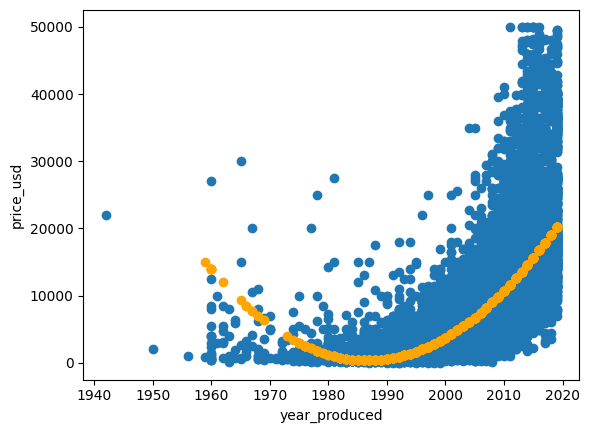

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

Модель справилась весьма неплохо, теперь попробуем с регуляризациями.

Lasso.

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1}

MAE: 2496.369542487444
MSE: 17276430.993859377
RMSE: 4156.492631276925
MAPE: 0.7802185207896052
R^2: 0.5930917976242216


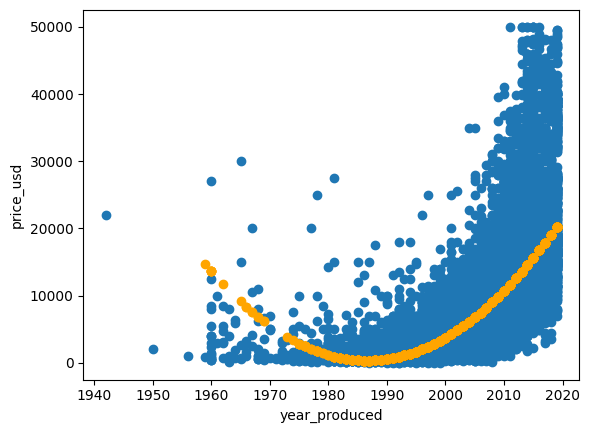

In [ ]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

Ridge.

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1}

MAE: 2499.412574975786
MSE: 17282788.949397
RMSE: 4157.25738310692
MAPE: 0.7835004392976754
R^2: 0.592942050013762


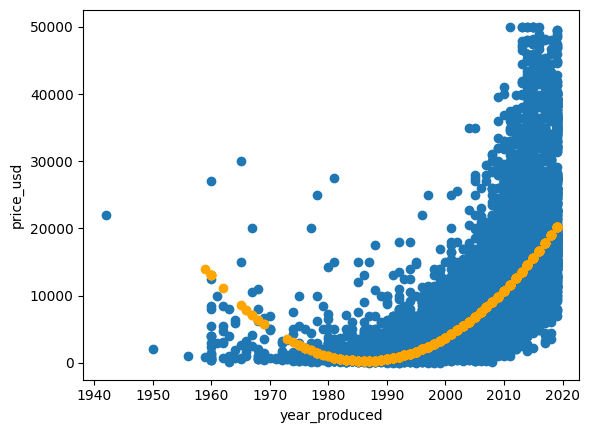

In [ ]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

ElasticNet

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__alpha": [0.1, 1, 5, 10],
    "model__l1_ratio": np.arange(0.2, 1, 0.2),

}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.8}

MAE: 2958.7834426112736
MSE: 22883025.27207095
RMSE: 4783.620519237595
MAPE: 1.4284073350423574
R^2: 0.4610408433496801


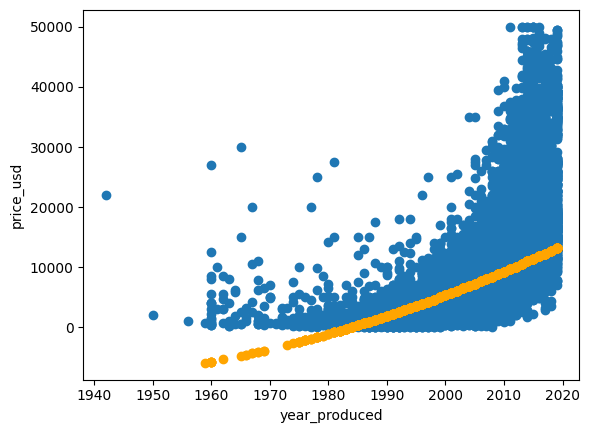

In [ ]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

Модель с ElasticNet справилась хуже остальных.

## **Выводы**

Лучше всего справилась модель множественной линейной регрессии без регуляризации и с регуляризациями lasso и ridge. Регуляризация ElasticNet показала себя хуже всего. Также неплохо справилась полиномиальная регрессия по предиктору year_produced, где регуляризация ElasticNet также ухудшила точность модели на тестовых данных.

## **Метрики**

In [ ]:
from numpy.typing import ArrayLike
from typing import List, NamedTuple

class FormatResult(NamedTuple):
    predict: List[float]
    actual: List[float]

def format(predict: np.ndarray, actual: np.ndarray) -> FormatResult:
    """
    parameters
        predict - 1darray of predicted values (float or int) \n
        actual - 1-dimension DataFrame

    returns
        predict - iterable[float] \n
        actual - iterable[float]
    """
    pred = list(predict)
    act = []
    
    for _list in actual:  # actual.values contains lists which contains 1 element
        act.append(_list[0])

    return FormatResult(
        predict=pred,
        actual=act
    )

Отформатируем тренировочные и тестовые выборки для вызова функций

In [ ]:
y_pred, y_test = format(np.array(y_pred), y_test)

Вызовем функции и сравним их результаты с встроенными в sklearn

In [ ]:
def mae(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append(abs(actual - predict))
    return np.average(arr)


def mse(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append((actual - predict) ** 2)
    return np.average(arr)


def mape(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append(abs((actual - predict) / actual))
    return np.average(arr)


def r2(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    m = len(y_predict)
    average_actual = np.average(y_actual)
    sst = 0  # Total Sum of Squares  (сумма квадратов отклонений от среднего)
    for actual in y_actual:
        sst += (actual - average_actual) ** 2
    return  float(1 - mse(y_predict, y_actual) * m / sst)


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My_MAE: {mae(y_predict=y_pred, y_actual=y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, My_MSE: {mse(y_predict=y_pred, y_actual=y_test)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}, My_RMSE: {sqrt(mse(y_predict=y_pred, y_actual=y_test))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}, My_MAPE: {mape(y_predict=y_pred, y_actual=y_test)}')
print(f'R^2: {pipeline.score(X_test, y_test)}, My_r2: {r2(y_predict=y_pred, y_actual=y_test)}')

MAE: 2958.7834426112736, My_MAE: 2958.7834426112736
MSE: 22883025.27207095, My_MSE: 22883025.27207095
RMSE: 4783.620519237595, My_RMSE: 4783.620519237595
MAPE: 1.4284073350423574, My_MAPE: 1.4284073350423574
R^2: 0.4610408433496801, My_r2: 0.4610408433496822


## **Класс линейной регрессии**

Сделал матричным способом, но не все коэффициенты совпадают. Не понимаю, как задать функцию ошибок, чтобы нормально вычислить её градиент.

In [ ]:
from numpy.typing import ArrayLike
from numpy.linalg import inv
from numpy import transpose, dot
from typing import Self, Any

class LinearRegression_:
    def __init__(self, n_iter: int = 10000, learning_rate: float = 0.01) -> None:  # Никакие аргументы тут не нужны, просто оставил как в примере, чтобы не искать потом
        self.w = []
        self.b = 0
        self.n_iter = n_iter
        self.learning_rate = learning_rate

    def fit(self, x: pd.DataFrame, y: pd.Series) -> None:
        len = x.shape[0]
        ones = np.full((len), 1)
        x.insert(0, "ones", ones)
        self.w = dot(dot(inv(dot(transpose(x), (x))), transpose(x)), (y))
        self.b = self.w[0]
        self.w = self.w[1:]
    
    def predict(self, x: ArrayLike) -> Any:
        return dot(x, transpose(self.w))

In [ ]:
y = data["price_usd"]
x = data.drop("price_usd", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
lr = LinearRegression()
my_lr = LinearRegression_()

lr.fit(X_train, y_train)
my_lr.fit(X_train, y_train)

In [ ]:
y_pred = my_lr.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 9.280675407729229e+16
MSE: 8.613093602363011e+33
RMSE: 9.28067540772923e+16
MAPE: 39455868944810.57


c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


ValueError: X has 58 features, but MinMaxScaler is expecting 1 features as input.

In [ ]:
lr.coef_

array([-4.77197499e-03,  3.84890552e+02,  9.17636284e+02,  7.27785971e+01,
       -5.12633417e-01,  1.59708567e+00, -1.46823824e+03, -1.28401913e+03,
       -3.82995174e+02, -2.73527487e+02,  4.20465611e+02,  6.11717351e+02,
        2.71468997e+03,  1.84831389e+03,  1.52268743e+03,  5.23529705e+02,
        5.41078450e+01,  6.08620268e+02, -2.18547999e+02, -1.10117403e+02,
        2.49173198e+02, -1.35085780e+02,  6.29135930e+01, -2.48592810e+02,
        2.48592810e+02,  5.83196512e+02,  3.14343398e+02,  1.70863471e+02,
       -9.33923417e+01,  2.18699945e+03,  1.48396217e+03,  9.45399522e+02,
        4.61636114e+03,  5.02780892e+03,  1.31069532e+03,  4.54110673e+02,
        8.46318810e+02, -9.16130183e+01,  9.99757767e+03,  1.13961624e+04,
       -2.17111869e+03,  1.08054638e+03, -3.72981996e+02, -2.51477423e+02,
        8.69041058e+00, -8.13261760e+02,  1.91669889e+03, -2.27835931e+02,
        3.47242661e+02, -6.86258400e+02,  4.91347219e+02,  7.34729075e+02,
        3.09373320e+00,  

In [ ]:
my_lr.w

array([-9.25181272e-03,  2.30651569e+02,  1.03340551e+03,  4.66804347e+01,
       -2.56650571e-02,  1.68858463e+00, -3.07920373e+03, -2.42335940e+03,
       -9.92883071e+02, -5.77417924e+02,  3.53847974e+02,  6.10174128e+02,
        6.11232564e+03,  3.19541559e+03,  2.80420267e+03,  1.21241538e+03,
        2.71069381e+02,  8.37737256e+02, -1.44259755e+01, -8.89468417e+01,
        2.75978473e+02, -4.93856120e+01,  1.08641743e+02,  1.41005407e+17,
        1.41005407e+17,  7.13755074e+02,  2.46034188e+02,  1.91721267e+02,
       -5.58058714e+01, -8.33040197e+04, -8.24603269e+04, -8.19186376e+04,
        8.72194379e+04,  5.02780892e+03,  1.31069532e+03,  4.54110673e+02,
        8.46318810e+02, -9.16130182e+01,  9.99757767e+03,  1.13961624e+04,
       -2.17111869e+03,  1.08054638e+03, -3.72981996e+02, -2.51477423e+02,
        8.69041058e+00, -8.13261760e+02,  1.91669889e+03, -2.27835931e+02,
        3.47242661e+02, -6.86258400e+02,  4.91347219e+02,  7.34729075e+02,
        3.09373321e+00,  

## **Метрики - вопрос про импорт**

In [ ]:
from exceptions import MetricError
from metrics import mae  # Вопрос!!! Как импортировать файлы из других папок, а не только из той, в которой лежит блокнот?


In [ ]:
import sys
sys.path

['c:\\Users\\Halim\\ML_labs_3_sem\\notebooks\\Lab3',
 'C:\\Users\\Halim\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'C:\\Users\\Halim\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'C:\\Users\\Halim\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'C:\\Users\\Halim\\AppData\\Local\\Programs\\Python\\Python311',
 'c:\\Users\\Halim\\ML_labs_3_sem\\venv',
 '',
 'c:\\Users\\Halim\\ML_labs_3_sem\\venv\\Lib\\site-packages',
 'c:\\Users\\Halim\\ML_labs_3_sem\\venv\\Lib\\site-packages\\win32',
 'c:\\Users\\Halim\\ML_labs_3_sem\\venv\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\Halim\\ML_labs_3_sem\\venv\\Lib\\site-packages\\Pythonwin']

In [ ]:
# def mae(y_predict, y_actual):
#     if (len(y_predict) != len(y_actual)):
#         raise MetricError()
#         print("Не совпадают размерности")
    
#     arr = []
#     for i, predict in enumerate(y_predict):
#         actual = y_actual[i]
#         arr.append(abs(actual - predict))
#     return arr

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My_MAE: {mae(y_actual=y_test, y_predict=y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MetricError: 